In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rc('figure', figsize=(16., 8.))
%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
iris_data = DataFrame(X, columns=['sep_length', 'sep_width', 'pet_length', 'pet_width'])

In [7]:
iris_data.head(10)

,sep_length,sep_width,pet_length,pet_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [8]:
iris_target = DataFrame(y, columns=['species'])

In [14]:
iris_target.groupby(iris_target.species).count()

""
species
0
1
2


In [18]:
id_to_species = {
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
}

In [20]:
iris_target.species = iris_target.species.map(id_to_species)

In [23]:
iris = pd.concat([iris_data, iris_target], axis=1)
iris.head(10)

,sep_length,sep_width,pet_length,pet_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


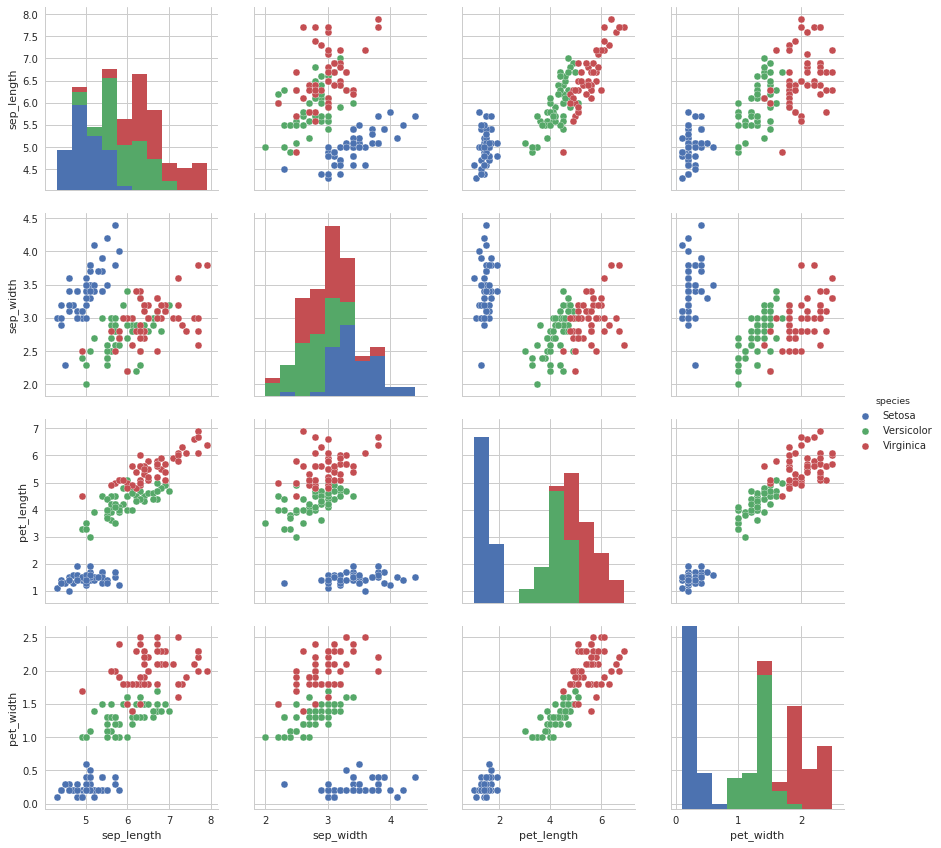

In [35]:
sns.set(rc={'figure.facecolor': 'white'})
sns.set_style('whitegrid')
sns.pairplot(iris, hue='species', size=3)

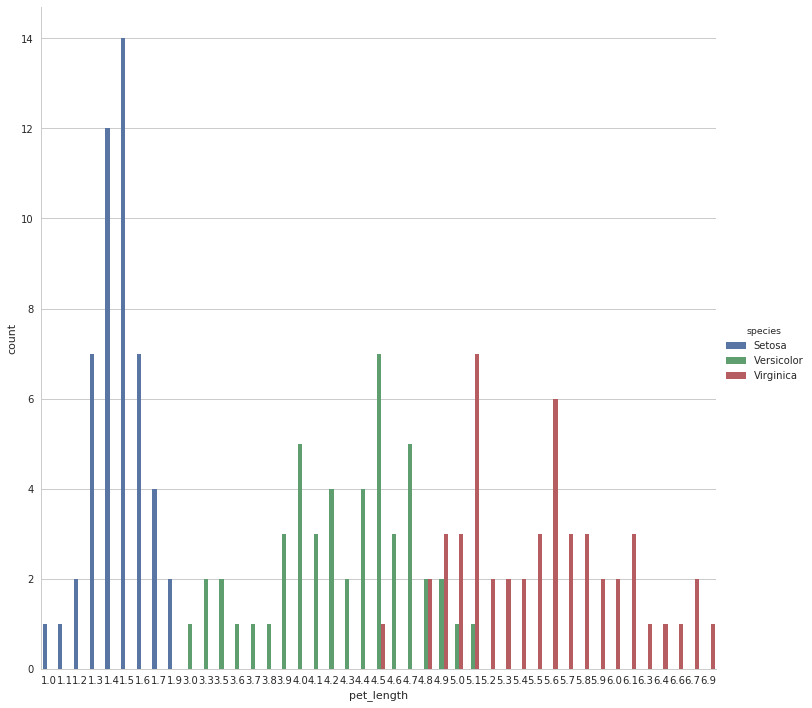

In [54]:
sns.factorplot(x='pet_length', data=iris, hue='species', kind='count', size=10)

In [55]:
iris.columns

Index(['sep_length', 'sep_width', 'pet_length', 'pet_width', 'species'], dtype='object')

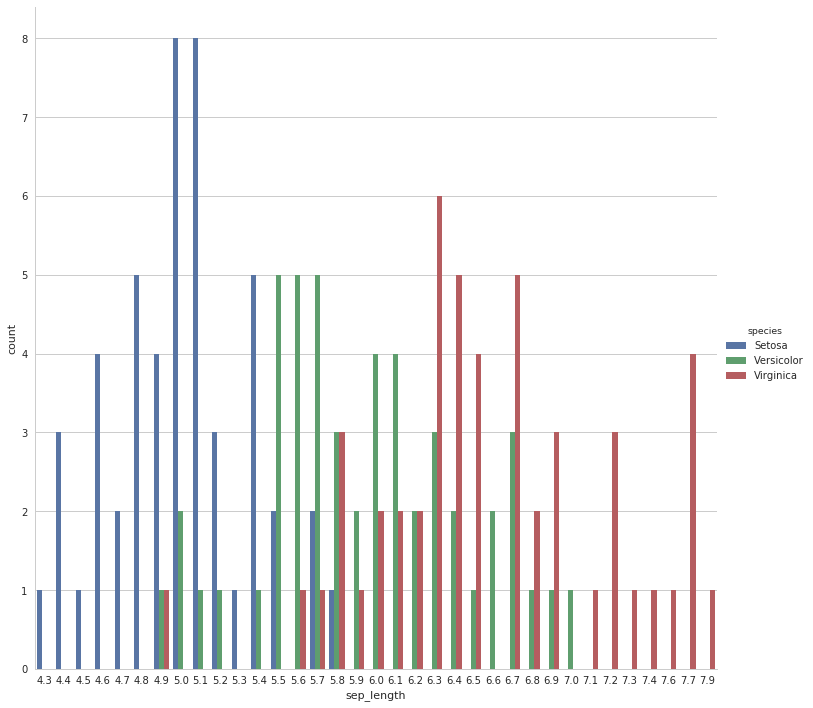

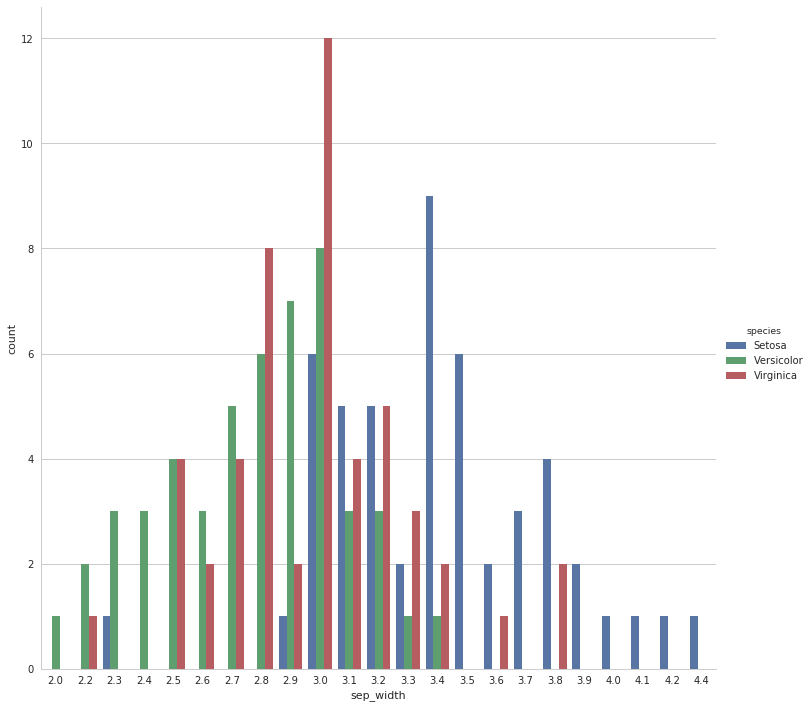

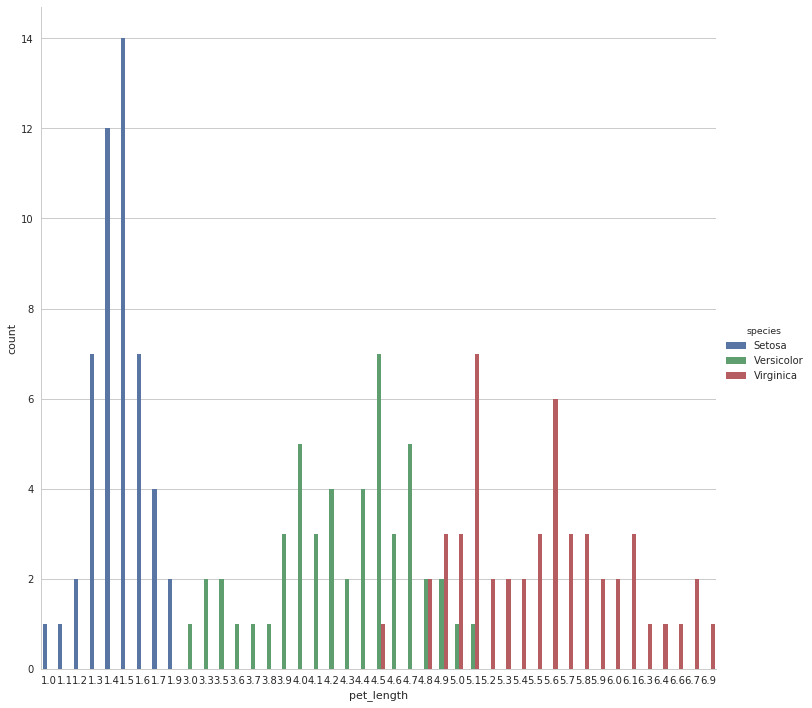

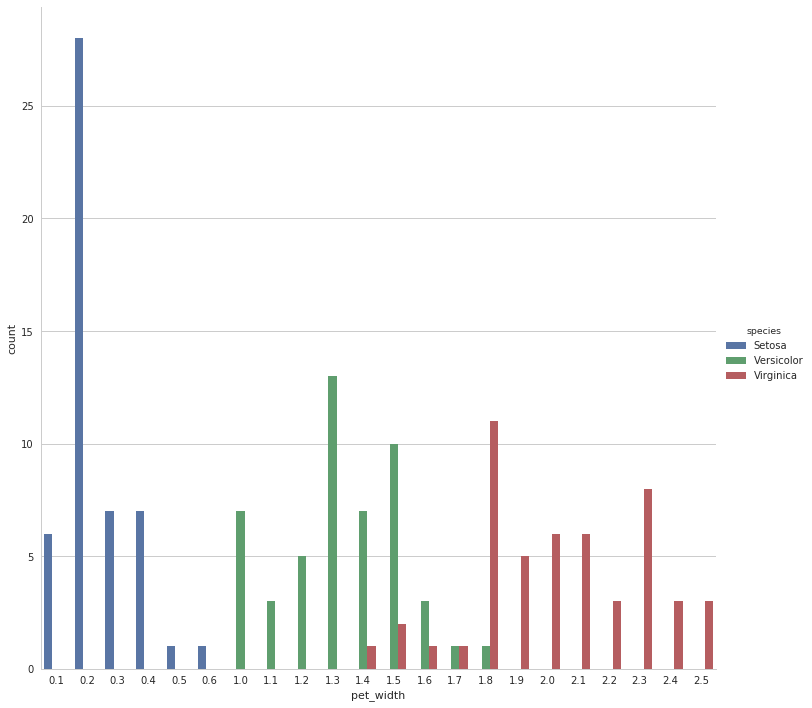

In [57]:
for feat in iris.columns[:-1]:
    sns.factorplot(x=feat, data=iris, hue='species', kind='count', size=10)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [84]:
logistic_regr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=3)

In [85]:
logistic_regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
from sklearn import metrics

In [87]:
y_pred = logistic_regr.predict(X_test)

In [88]:
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [89]:
metrics.accuracy_score(y_test, y_pred)

0.93333333333333335

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn = KNeighborsClassifier(n_neighbors=6)

In [92]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [94]:
y_pred = knn.predict(X_test)

In [95]:
metrics.accuracy_score(y_test, y_pred)

0.94999999999999996

In [96]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.96666666666666667

In [105]:
max_k = 20
k_range = range(1,max_k+1)
accuracy = np.zeros((max_k,1))

In [106]:
accuracy.shape

(20, 1)

In [108]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy[k-1] = metrics.accuracy_score(y_test, y_pred)

In [109]:
accuracy

array([[ 0.96666667],
       [ 0.96666667],
       [ 0.95      ],
       [ 0.95      ],
       [ 0.93333333],
       [ 0.95      ],
       [ 0.95      ],
       [ 0.95      ],
       [ 0.95      ],
       [ 0.93333333],
       [ 0.93333333],
       [ 0.95      ],
       [ 0.96666667],
       [ 0.96666667],
       [ 0.96666667],
       [ 0.95      ],
       [ 0.96666667],
       [ 0.95      ],
       [ 0.95      ],
       [ 0.95      ]])

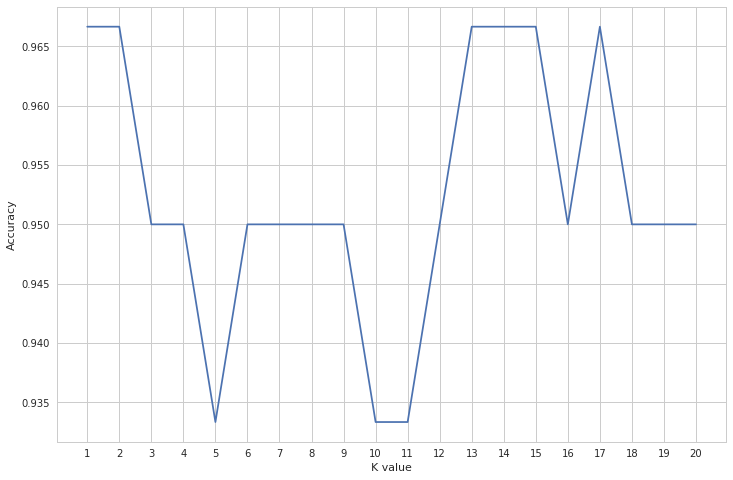

In [114]:
plt.figure(figsize=(12.,8.))
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.xticks(k_range)
plt.ylabel('Accuracy')